## Burgers Equation

$$ \frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2} $$

In [16]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft 

## Initial function which we will use

In [17]:
def initial_condition(x):
    return -np.sin(np.pi*x)

#### Taking the initial conditions

In [18]:
Range_start = -1 #initial condition of where to start
Range_stop = 1 #Final point where we will stop
Range_length = Range_stop - Range_start # Will give the length of the condition
dx = 0.001 # Will define the minimum x difference
num_points = int(round(Range_length/dx) + 1) # Will give the mumber of points
x_range = np.linspace(Range_start,Range_stop,int(num_points)) # Will output the x values

nu = 0.01/np.pi # Defining the value of nu

In [19]:
num_points

2001

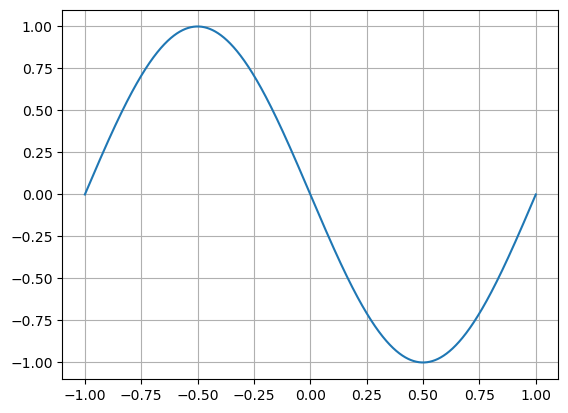

In [20]:
u_0 = initial_condition(x_range) # will give initial condition in the real space
plt.plot(x_range,u_0) # Plot for visualization
plt.grid()

##### Creating fft parameters

In [21]:
dt = 0.001 # time step value
t_max = 1 # Maximum time range
num_t_points = int(round(t_max)/dt + 1) # Number of points
t_range = np.linspace(0,t_max,int(num_t_points))

In [22]:
kappa = 2*np.pi*fft.fftfreq(num_points,d=dx)
#u = fft.fft(u_0)
#plt.plot(kappa,u.real)
#plt.xlim([-10,10])

In [23]:
def du_dt(u,time_range,kappa,nu):
    u_hat = fft.fft(u)
    fourier_du_dx = 1j*kappa*u_hat
    fourier_du2_dx2 = -(kappa**2)*u_hat

    real_du_dt = fft.ifft(fourier_du_dx)
    real_du2_dx2 = fft.ifft(fourier_du2_dx2)

    return (-u*real_du_dt + nu*real_du2_dx2).real

In [24]:
u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
u_record[1,1]

0.003992937587371263

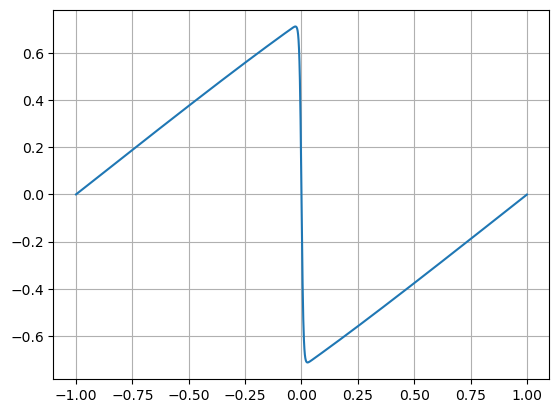

In [25]:
time_asked = int(round(1000*1))
plt.plot(x_range,u_record[time_asked,:])
plt.grid()

In [26]:
U_value_stack = u_record.reshape(-1,1)
x_range_stack = x_range.reshape(1,-1)
x_range_stack = np.tile(x_range_stack,(num_t_points,1)).flatten().reshape(-1,1)
time_range_stack = np.tile(t_range.reshape(-1,1),(1,num_points)).reshape(-1,1)
u0_value_stack = np.tile(u_0.reshape(1,-1),(len(x_range_stack),1))

In [27]:
Final_np_array = np.concatenate((u0_value_stack,x_range_stack,time_range_stack,U_value_stack),axis=1)
Final_np_array.shape

(2003001, 2004)

In [28]:
import pandas as pd

Final_df = pd.DataFrame(Final_np_array)
Final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,1.224647e-16,0.003142,0.006283,0.009425,0.012566,0.015707,0.018848,0.021989,0.02513,0.028271,...,-0.018848,-0.015707,-0.012566,-0.009425,-0.006283,-0.003142,-1.224647e-16,-1.000,0.0,1.224647e-16
1,1.224647e-16,0.003142,0.006283,0.009425,0.012566,0.015707,0.018848,0.021989,0.02513,0.028271,...,-0.018848,-0.015707,-0.012566,-0.009425,-0.006283,-0.003142,-1.224647e-16,-0.999,0.0,3.141587e-03
2,1.224647e-16,0.003142,0.006283,0.009425,0.012566,0.015707,0.018848,0.021989,0.02513,0.028271,...,-0.018848,-0.015707,-0.012566,-0.009425,-0.006283,-0.003142,-1.224647e-16,-0.998,0.0,6.283144e-03
3,1.224647e-16,0.003142,0.006283,0.009425,0.012566,0.015707,0.018848,0.021989,0.02513,0.028271,...,-0.018848,-0.015707,-0.012566,-0.009425,-0.006283,-0.003142,-1.224647e-16,-0.997,0.0,9.424638e-03
4,1.224647e-16,0.003142,0.006283,0.009425,0.012566,0.015707,0.018848,0.021989,0.02513,0.028271,...,-0.018848,-0.015707,-0.012566,-0.009425,-0.006283,-0.003142,-1.224647e-16,-0.996,0.0,1.256604e-02


In [30]:
Final_df.to_pickle("test_df.pkl")

In [29]:
# Final_df.to_csv("minus_sin_pix.csv")

KeyboardInterrupt: 